In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.read_csv('E:/UCL/EDAA/Solar_Energy_Production_v4.3RICHMOND.csv') 

X = data.drop('kWh', axis=1).values
y = data['kWh'].values

kf = KFold(n_splits=10, shuffle=True, random_state=1)

hidden_layers_range = range(1, 11)
neurons_per_layer = 20

average_mse_scores = []

for hidden_layers in hidden_layers_range:
    fold_mse_scores = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model = Sequential()
        model.add(Dense(neurons_per_layer, activation='relu', input_shape=(X_train.shape[1],)))
        for _ in range(hidden_layers - 1):
            model.add(Dense(neurons_per_layer, activation='relu'))
        model.add(Dense(1))
        
        model.compile(optimizer='adam', loss='mean_squared_error')
        
        model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
        
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        fold_mse_scores.append(mse)
    
    average_mse = np.mean(fold_mse_scores)
    average_mse_scores.append(average_mse)

plt.figure(figsize=(10, 6))
plt.plot(hidden_layers_range, average_mse_scores, marker='o')
plt.title('Average MSE vs. Number of Hidden Layers')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Average MSE')
plt.show()


In [2]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

best_hidden_layers = 6

r_squared_scores = []
mse_scores = []
nrmse_scores = []
nmae_scores = []
mape_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = Sequential()
    model.add(Dense(neurons_per_layer, activation='relu', input_shape=(X_train.shape[1],)))
    for _ in range(best_hidden_layers - 1):
        model.add(Dense(neurons_per_layer, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    nrmse = np.sqrt(mse) / np.mean(y_test)
    nmae = mean_absolute_error(y_test, predictions) / np.mean(y_test)
    mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

    r_squared_scores.append(r2)
    mse_scores.append(mse)
    nrmse_scores.append(nrmse)
    nmae_scores.append(nmae)
    mape_scores.append(mape)

mean_r_squared = np.mean(r_squared_scores)
std_dev_r_squared = np.std(r_squared_scores)
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
mean_nrmse = np.mean(nrmse_scores)
mean_nmae = np.mean(nmae_scores)
mean_mape = np.mean(mape_scores)

print(f"R-squared: Mean = {mean_r_squared}, Std Dev = {std_dev_r_squared}")
print(f"MSE: Mean = {mean_mse}, Std Dev = {std_mse}")
print(f"NRMSE: Mean = {mean_nrmse}")
print(f"NMAE: Mean = {mean_nmae}")
print(f"MAPE: Mean = {mean_mape}")



NameError: name 'kf' is not defined

In [1]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--') 
plt.show()


NameError: name 'y_test' is not defined

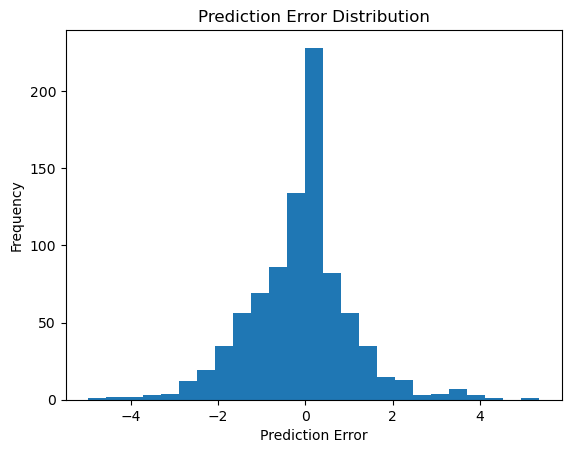

In [10]:
errors = predictions - y_test
plt.hist(errors, bins=25)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Prediction Error Distribution')
plt.show()